<a href="https://colab.research.google.com/github/nhquynhhh/IS403_O21_2/blob/week7_hoangmanhthang/Model/RNN/KDH_RNN_9_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
# 1. Import thư viện cần thiết
# from google.colab import drive
# drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [117]:
# 2. Đọc file csv
df = pd.read_csv('KDH-Data.csv')
df

,Date,Price
0,2017-01-03,9198.4
1,2017-01-04,9198.4
2,2017-01-05,8944.8
3,2017-01-06,9083.2
4,2017-01-07,9106.2
...,...,...
2702,2024-05-28,36250.0
2703,2024-05-29,35700.0
2704,2024-05-30,36050.0
2705,2024-05-31,36200.0


In [118]:
df1=df.reset_index()['Price']

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2707 entries, 0 to 2706
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2707 non-null   object 
 1   Price   2707 non-null   float64
dtypes: float64(1), object(1)
memory usage: 42.4+ KB


In [120]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [121]:
# 4. Chia train test
train_size = int(0.9 * len(df1))
test_size = int(0.1 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [122]:
test_data

array([[0.56346975],
       [0.56665542],
       [0.56665542],
       [0.56133817],
       [0.56452969],
       [0.56452969],
       [0.53151938],
       [0.54004572],
       [0.54217731],
       [0.52727963],
       [0.52727963],
       [0.53366033],
       [0.53366033],
       [0.52514804],
       [0.51449011],
       [0.54644048],
       [0.53151938],
       [0.49319766],
       [0.52215913],
       [0.52215913],
       [0.46124728],
       [0.46124728],
       [0.48043156],
       [0.48788041],
       [0.48574882],
       [0.47531107],
       [0.47531107],
       [0.48253973],
       [0.46274642],
       [0.46977363],
       [0.45571921],
       [0.48148565],
       [0.47045293],
       [0.47045293],
       [0.48148565],
       [0.47914324],
       [0.47445844],
       [0.49202646],
       [0.54004572],
       [0.4934319 ],
       [0.4934319 ],
       [0.53301851],
       [0.48382805],
       [0.47445844],
       [0.47328723],
       [0.49788247],
       [0.49249494],
       [0.492

In [123]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [124]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
# X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [125]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [126]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [127]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
37/37 [==============================] - 3s 41ms/step - loss: 0.0030 - val_loss: 4.9175e-04
Epoch 2/100
37/37 [==============================] - 1s 22ms/step - loss: 6.1817e-04 - val_loss: 4.7443e-04
Epoch 3/100
37/37 [==============================] - 1s 21ms/step - loss: 4.7941e-04 - val_loss: 4.4730e-04
Epoch 4/100
37/37 [==============================] - 1s 21ms/step - loss: 4.3988e-04 - val_loss: 6.1500e-04
Epoch 5/100
37/37 [==============================] - 1s 33ms/step - loss: 4.1206e-04 - val_loss: 7.8768e-04
Epoch 6/100
37/37 [==============================] - 1s 37ms/step - loss: 4.1165e-04 - val_loss: 5.7862e-04
Epoch 7/100
37/37 [==============================] - 1s 40ms/step - loss: 4.2060e-04 - val_loss: 6.8331e-04
Epoch 8/100
37/37 [==============================] - 1s 25ms/step - loss: 4.0555e-04 - val_loss: 2.9821e-04
Epoch 9/100
37/37 [==============================] - 1s 22ms/step - loss: 3.1155e-04 - val_loss: 2.9460e-04
Epoch 10/100
37/37 [============

In [128]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

6/6 [==============================] - 0s 9ms/step


In [129]:
# 11. Chuẩn hóa dữ liệu y_pred
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

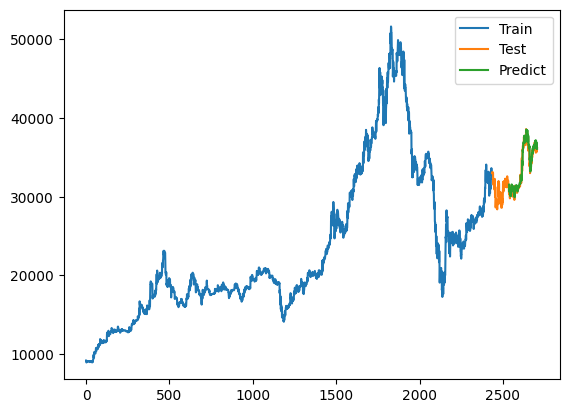

In [130]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
plt.legend(['Train','Test','Predict'])
plt.show()

In [131]:
ytest = scaler.inverse_transform(ytest.reshape(-1, 1))

In [132]:
# prompt: print RMSE, MAPE, MAE using lib

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(ytest, y_pred))
print("RMSE:", rmse)


# Calculate MAE
mae = mean_absolute_error(ytest, y_pred)
print("MAE:", mae)

# Calculate MAPE
mape = mean_absolute_percentage_error(ytest, y_pred)
print("MAPE:", mape)


RMSE: 580.0367513418548
MAE: 436.1018860946744
MAPE: 0.01289005199448013


In [133]:
predictions_30 = []
input_data = X_test[-20]  # Lấy dữ liệu cuối cùng từ X_test
for i in range(30):  # Thực hiện dự đoán liên tiếp 60 lần
    prediction = model.predict(input_data.reshape(1, time_step, 1))
    predictions_30.append(prediction[0])
    input_data = np.append(input_data[1:], prediction[0])  # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo


1/1 [==============================] - 0s 25ms/step


In [134]:
predictions_60 = []
input_data = X_test[-20]  # Lấy dữ liệu cuối cùng từ X_test
for i in range(60):  # Thực hiện dự đoán liên tiếp 60 lần
    prediction = model.predict(input_data.reshape(1, time_step, 1))
    predictions_60.append(prediction[0])
    input_data = np.append(input_data[1:], prediction[0])  # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo


1/1 [==============================] - 0s 27ms/step


In [135]:
predictions_90 = []
input_data = X_test[-20]  # Lấy dữ liệu cuối cùng từ X_test
for i in range(90):  # Thực hiện dự đoán liên tiếp 60 lần
    prediction = model.predict(input_data.reshape(1, time_step, 1))
    predictions_90.append(prediction[0])
    input_data = np.append(input_data[1:], prediction[0])  # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo


1/1 [==============================] - 0s 28ms/step


In [136]:
y_pred30=scaler.inverse_transform(predictions_30)
y_pred30

array([[36344.27367096],
       [36559.45724659],
       [36831.60664387],
       [37072.64074802],
       [37215.14054604],
       [37413.59087276],
       [37692.93892593],
       [37924.8811964 ],
       [38087.7377449 ],
       [38250.18206921],
       [38580.07084465],
       [38891.18306236],
       [39170.8720911 ],
       [39408.52697468],
       [39732.15859394],
       [40009.14271946],
       [40266.16959572],
       [40654.29140053],
       [40942.88396301],
       [41263.72416286],
       [41516.57790527],
       [41826.21934776],
       [42093.71977215],
       [42365.40859795],
       [42619.65423317],
       [42879.32748699],
       [43101.3865551 ],
       [43379.58445187],
       [43624.42526836],
       [43896.69680614]])

In [137]:
y_pred30=scaler.inverse_transform(predictions_30)
y_pred60=scaler.inverse_transform(predictions_60)

y_pred90=scaler.inverse_transform(predictions_90)


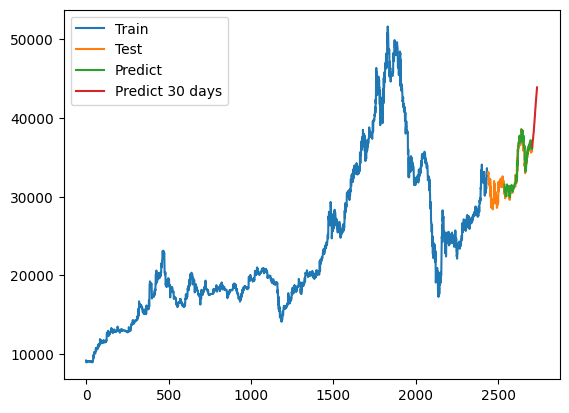

In [138]:
# Tính toán chỉ số của dữ liệu dự đoán cho 30, 60 và 90 ngày tiếp theo

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
predict_30_days = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+30, step=1)
plt.plot(predict_30_days,(y_pred30))
plt.legend(['Train','Test','Predict', 'Predict 30 days'])
plt.show()



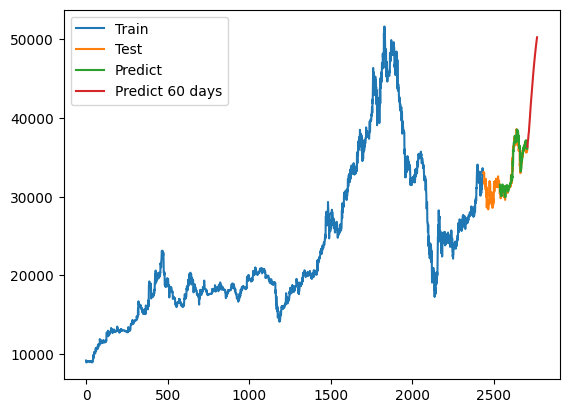

In [139]:
# Tính toán chỉ số của dữ liệu dự đoán cho 30, 60 và 90 ngày tiếp theo

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
predict_60_days = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+60, step=1)
plt.plot(predict_60_days,(y_pred60))
plt.legend(['Train','Test','Predict','Predict 60 days',])
plt.show()



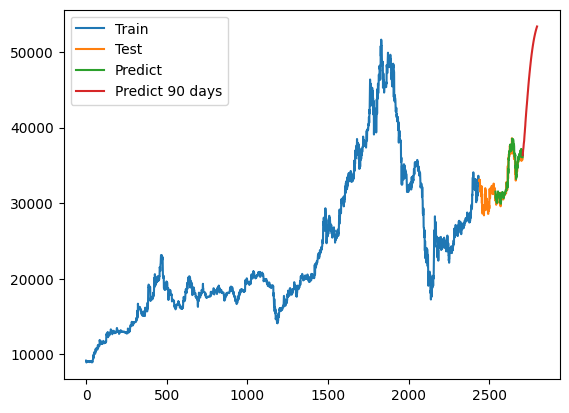

In [140]:
# Tính toán chỉ số của dữ liệu dự đoán cho 30, 60 và 90 ngày tiếp theo

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
predict_90_days = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+90, step=1)
plt.plot(predict_90_days,(y_pred90))
plt.legend(['Train','Test','Predict', 'Predict 90 days'])
plt.show()

